In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split


In [ ]:
# prompt: Write a python code to import data from google drive

from google.colab import drive
drive.mount('/content/drive')

# Example: Import a CSV file
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/NEISS.TXT', delimiter='\t')

# Now you can work with the data in the 'data' variable.
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   CPSC_Case_Number Treatment_Date  Age  Sex  Race Other_Race  Hispanic  \
0         110100413     01/01/2011   15    1     2        NaN       NaN   
1         110104625     01/01/2011   46    1     0        NaN       NaN   
2         110106682     01/04/2011   14    1     2        NaN       NaN   
3         110107736     01/02/2011   14    1     1        NaN       NaN   
4         110107744     01/03/2011   14    1     1        NaN       NaN   

   Body_Part  Diagnosis Other_Diagnosis  ...  Fire_Involvement  Alcohol Drug  \
0         79         64             NaN  ...                 0      NaN  NaN   
1         88         59             NaN  ...                 0      NaN  NaN   
2         37         64             NaN  ...                 0      NaN  NaN   
3         35         64             NaN  ...                 0      NaN  NaN   
4         76        

<ipython-input-4-b4028687f087>:8: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/NEISS.TXT', delimiter='\t')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117110 entries, 0 to 117109
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CPSC_Case_Number   117110 non-null  int64  
 1   Treatment_Date     117110 non-null  object 
 2   Age                117110 non-null  int64  
 3   Sex                117110 non-null  int64  
 4   Race               117110 non-null  int64  
 5   Other_Race         7166 non-null    object 
 6   Hispanic           16209 non-null   float64
 7   Body_Part          117110 non-null  int64  
 8   Diagnosis          117110 non-null  int64  
 9   Other_Diagnosis    17203 non-null   object 
 10  Body_Part_2        1563 non-null    float64
 11  Diagnosis_2        1563 non-null    float64
 12  Other_Diagnosis_2  482 non-null     object 
 13  Disposition        117110 non-null  int64  
 14  Location           117110 non-null  int64  
 15  Fire_Involvement   117110 non-null  int64  
 16  Al

In [ ]:
# get the columns we want
df_smaller = df[['Age', 'Sex', 'Race', 'Body_Part', 'Diagnosis', 'Disposition',
                 'Fire_Involvement', 'Stratum', 'Location']]

# display the table so we can be sure it is what we want
display(df_smaller)

,Age,Sex,Race,Body_Part,Diagnosis,Disposition,Fire_Involvement,Stratum,Location
0,15,1,2,79,64,1,0,S,8
1,46,1,0,88,59,1,0,V,9
2,14,1,2,37,64,1,0,S,8
3,14,1,1,35,64,1,0,L,9
4,14,1,1,76,53,1,0,L,9
...,...,...,...,...,...,...,...,...,...
117105,13,1,2,37,64,1,0,C,0
117106,16,1,1,37,71,1,0,C,0
117107,14,1,2,37,57,1,0,C,0
117108,17,1,2,75,52,1,0,C,8


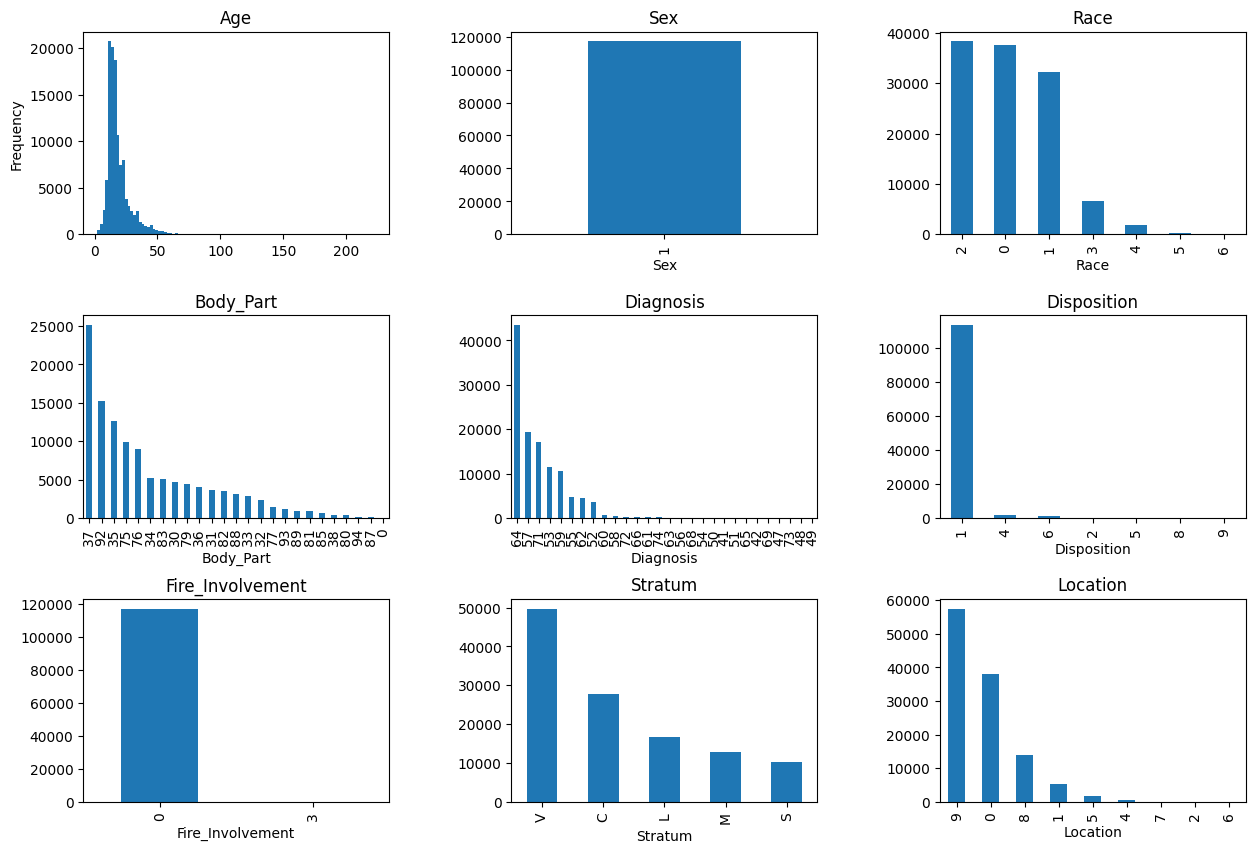

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for idx, d in enumerate(df_smaller.columns):
  fig.add_subplot(3,3,idx+1)
  if d == 'Age':
    df[d].plot(kind='hist', bins=100, title=d)
  else:
    df[d].value_counts().plot(kind='bar', title=d)

In [ ]:
# remove any unknown values by setting their value to NaN (not a number) and dropping them
df_smaller.loc[df_smaller.Disposition == 9, 'Disposition'] = np.nan
df_smaller['Disposition'] = df_smaller['Disposition'].dropna()

# recode individuals admitted as "admit" and those not admitted as "notadmit"
df_smaller.loc[~df_smaller.Disposition.isin([4,5,8]), 'Disposition'] = 'notadmit'
df_smaller.loc[df_smaller.Disposition.isin([4,5,8]), 'Disposition'] = 'admit'
df_smaller['Disposition'].value_counts()

<ipython-input-8-7bf814489397>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smaller['Disposition'] = df_smaller['Disposition'].dropna()
<ipython-input-8-7bf814489397>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'notadmit' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_smaller.loc[~df_smaller.Disposition.isin([4,5,8]), 'Disposition'] = 'notadmit'


,count
Disposition,
notadmit,115065
admit,2045


In [ ]:
# set the categorical data columns
categorical_cols = ['Sex', 'Race', 'Body_Part', 'Diagnosis', 'Fire_Involvement', 'Stratum', 'Location']
# make dummy variables for them
df_dummy = pd.get_dummies(df_smaller, columns = categorical_cols)

# and display at the end. Should have 117110 rows and 79 columns
display(df_dummy)

,Age,Disposition,Sex_1,Race_0,Race_1,Race_2,Race_3,Race_4,Race_5,Race_6,...,Stratum_V,Location_0,Location_1,Location_2,Location_4,Location_5,Location_6,Location_7,Location_8,Location_9
0,15,notadmit,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,46,notadmit,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,14,notadmit,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,14,notadmit,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,14,notadmit,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117105,13,notadmit,True,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
117106,16,notadmit,True,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
117107,14,notadmit,True,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
117108,17,notadmit,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# set our "X" variable to be the predictors and set Y to be the outcome
X = df_dummy.loc[:, df_dummy.columns != 'Disposition']
Y = df_dummy['Disposition']

In [ ]:
#Install "imblearn" package to handle class imbalances
!pip install imblearn

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter

X_train_imbalanced, X_test, y_train_imbalanced, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train_imbalanced, y_train_imbalanced)

print(Counter(y_train))
print(Counter(y_test))

Counter({'notadmit': 80548, 'admit': 80548})
Counter({'notadmit': 34517, 'admit': 616})


In [ ]:
from sklearn import tree

scoring = ['accuracy', 'balanced_accuracy', 'precision_macro', 'recall_macro', 'roc_auc']
clf = tree.DecisionTreeClassifier(random_state=42)
scores = cross_validate(clf, X_train, y_train, scoring=scoring, return_estimator=True)
clf = scores['estimator'][np.argmax(scores['test_recall_macro'])]


In [ ]:
for k in scores.keys():
  if k != 'estimator':
    print(f"Train {k}: {np.mean(scores[k])}")

Train fit_time: 6.975841379165649
Train score_time: 2.436153936386108
Train test_accuracy: 0.97877052895041
Train test_balanced_accuracy: 0.9787705408826639
Train test_precision_macro: 0.9792082702360079
Train test_recall_macro: 0.9787705408826639
Train test_roc_auc: 0.9875160540629848


## Alternatively you can grid search

In [ ]:
tree_para = {'criterion':['gini','entropy'],
             'max_depth': [1,2,4]}

clf = GridSearchCV(tree.DecisionTreeClassifier(), tree_para, cv=5, verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)
clf = clf.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


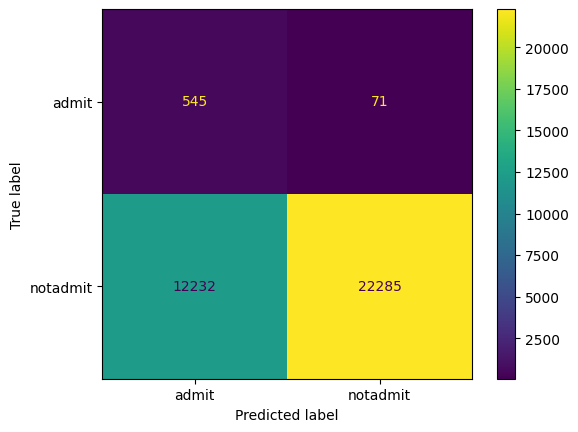

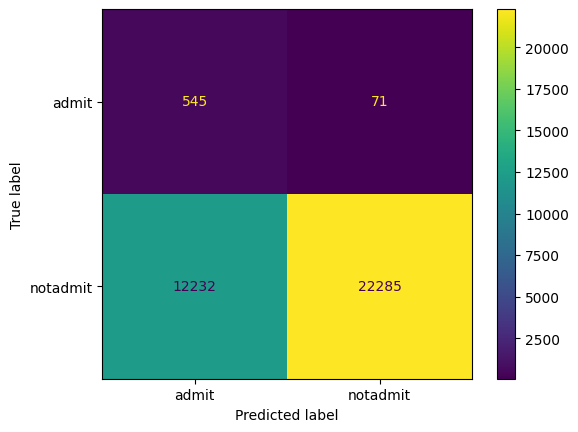

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming 'clf' is your trained classifier, 'X_test' is your test data, and 'y_test' are the true labels
# disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, values_format='')
# or
disp = ConfusionMatrixDisplay.from_predictions(y_test, clf.predict(X_test), values_format='')

disp.plot()


              precision    recall  f1-score   support

       admit       0.04      0.88      0.08       616
    notadmit       1.00      0.65      0.78     34517

    accuracy                           0.65     35133
   macro avg       0.52      0.77      0.43     35133
weighted avg       0.98      0.65      0.77     35133



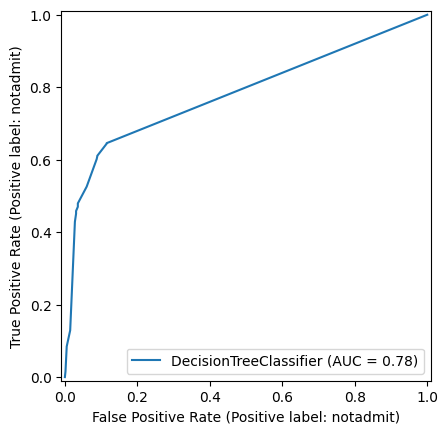

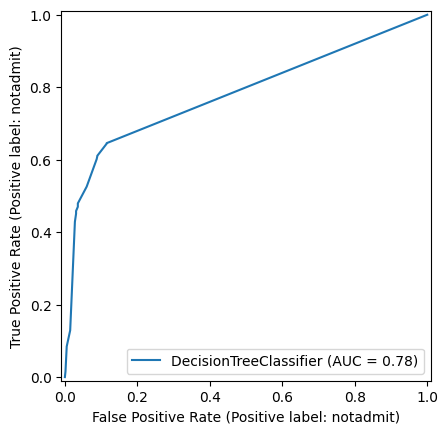

In [ ]:
from sklearn.metrics import classification_report, RocCurveDisplay

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

# Instead of plot_roc_curve, use RocCurveDisplay
RocCurveDisplay.from_estimator(clf, X_test, y_test).plot()
# or
# RocCurveDisplay.from_predictions(y_test, y_pred).plot()